<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-all-motifs" data-toc-modified-id="Get-all-motifs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get all motifs</a></span><ul class="toc-item"><li><span><a href="#Canonical-motifs" data-toc-modified-id="Canonical-motifs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Canonical motifs</a></span></li><li><span><a href="#Other-motifs" data-toc-modified-id="Other-motifs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Other motifs</a></span></li><li><span><a href="#New-C-term-motifs" data-toc-modified-id="New-C-term-motifs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>New C-term motifs</a></span></li><li><span><a href="#Internal-motifs" data-toc-modified-id="Internal-motifs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Internal motifs</a></span><ul class="toc-item"><li><span><a href="#Excursion-most-N-terminal-cysteine-positions-of-internally-prenylated-proteins" data-toc-modified-id="Excursion-most-N-terminal-cysteine-positions-of-internally-prenylated-proteins-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Excursion most N-terminal cysteine positions of internally prenylated proteins</a></span></li></ul></li><li><span><a href="#Save-fasta-file-with-correct-actualized-isoforms-and-motif-information" data-toc-modified-id="Save-fasta-file-with-correct-actualized-isoforms-and-motif-information-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Save fasta file with correct actualized isoforms and motif information</a></span></li><li><span><a href="#Add-new-motif-information-to-dfs-of-identified-proteins" data-toc-modified-id="Add-new-motif-information-to-dfs-of-identified-proteins-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Add new motif information to dfs of identified proteins</a></span></li></ul></li></ul></div>

In [ ]:
import sys
import os
import session_info

# Add the '0_functions' folder to sys.path
sys.path.append(os.path.join(os.getcwd(), '..', '0_functions'))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import read_fastafile
from functions import pep_Cterm

In [2]:
# Display session information
session_info.show()

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
datafolder = 'data'
known_proteins_datafolder = '../Known_prenylated_proteins/data'
figures = 'data/figures'
PSSMSearch = 'data/PssmSearch'

In [5]:
# Load data

# All identified prenylated proteins that contain a cysteine
all_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_all.csv'), sep=',')
known_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_known.csv'), sep=',')
novel_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_novel.csv'), sep=',')

# clean FASTA file of all identified proteins
fasta = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'clean_fasta_seqs_identified_prots.csv'), sep=',')

# Get all motifs

##### Identified prenylated proteins

In [6]:
print('All identified:', len(all_found))

All identified: 49


##### Known identified prenylated proteins

In [7]:
print('All known identified: ', len(known_found))

All known identified:  31


##### Novel identified prenylated proteins

In [8]:
print('All known identified: ', len(novel_found))

All known identified:  18


## Canonical motifs

In [9]:
# fasta contains the sequences of all identified proteins

In [10]:
# change sequence isoform of NP1L4! Q99733-2
fasta[fasta['ID'] == 'Q99733']

,ID,seqID,seq,len
28,Q99733,sp|Q99733|NP1L4_HUMAN,MADHSFSDGVPSDSVEAAKNASNTEKLTDQVMQNPRVLAALQERLDNVPHTPSSYIETLPKAVKRRINALKQLQVRCAHIEAKFYEEVHDLERKYAALYQPLFDKRREFITGDVEPTDAESEWHSENEEEEKLAGDMKSKVVVTEKAAATAEEPDPKGIPEFWFTIFRNVDMLSELVQEYDEPILKHLQDIKVKFSDPGQPMSFVLEFHFEPNDYFTNSVLTKTYKMKSEPDKADPFSFEGPEIVDCDGCTIDWKKGKNVTVKTIKKKQKHKGRGTVRTITKQVPNESFFNFFNPLKASGDGESLDEDSEFTLASDFEIGHFFRERIVPRAVLYFTGEAIEDDDNFEEGEEGEEEELEGDEEGEDEDDAEINPKV,375


In [11]:
fasta.loc[28, 'seq'] = "MADHSFSDGVPSDSVEAAKNASNTEKLTDQVMQNPRVLAALQERLDNVPHTPSSYIETLPKAVKRRINALKQLQVRCAHIEAKFYEEVHDLERKYAALYQPLFDKRREFITGDVEPTDAESEWHSENEEEEKLAGDMKSKVVVTEKAAATAEEPDPKGIPEFWFTIFRNVDMLSELVQEYDEPILKHLQDIKVKFSDPGQPMSFVLEFHFEPNDYFTNSVLTKTYKMKSEPDKADPFSFEGPEIVDCDGCTIDWKKGKNVTVKTIKKKQKHKGRGTVRTITKQVPNESFFNFFNPLKASGDGESLDEDSEFTLASDFEIGHFFRERIVPRAVLYFTGEAIEDDDNFEEGEEGEEEELEGDEEGEDEDDAEINPKKEPSQPAECKQQ"

In [12]:
# Add number of cysteines found in whole sequence
fasta['Ccount'] = fasta['seq'].str.count('C')

In [13]:
# Add position of the first C counting from the end of the sequence backwards
fasta['Cpos'] = [-next((pos for pos, amino in enumerate(reversed(seq), 1) if amino == 'C'), 0) for seq in fasta['seq']]

In [14]:
# Pipeline for detecting canonical motifs

aliph_AA = ['A', 'G', 'V', 'I', 'L']

motifs = {
    "CAAX": lambda seq: seq[-4] == 'C' and seq[-3] in aliph_AA and seq[-2] in aliph_AA,
    "CXXX": lambda seq: seq[-4] == 'C',
    "CCC": lambda seq: seq.endswith('CCC'),
    "CXC": lambda seq: seq[-3] == 'C' and seq[-1] == 'C',
    "CCX": lambda seq: seq[-3] == 'C' and seq[-2] == 'C',
    "CC": lambda seq: seq[-2] == 'C' and seq[-1] == 'C',
    "C": lambda seq: seq[-1] == 'C'
}

In [15]:
print('All identified:', len(fasta), '\n')

# Iteratively filter for each motif
for motif_name, condition in motifs.items():
    motif_df = fasta[fasta['seq'].apply(condition)].reset_index(drop=True)

    # annotate motif in df
    motif_df['motif'] = f'{motif_name}'
    
    globals()[f'fasta_{motif_name}'] = motif_df # Create a new variable with the name based on the motif
    
    fasta = fasta[~fasta['ID'].isin(motif_df['ID'])]  # Remove identified sequences
    print(f'{motif_name}:  \t', len(motif_df), '\t(', len(fasta), ' remaining)', sep='')

# Recap
fasta_canon = pd.concat([fasta_CAAX, fasta_CXXX, fasta_CXC, fasta_CCX, fasta_CC, fasta_C], ignore_index=True)
print('\nIdentified proteins with canonical motifs: ', len(fasta_canon), '\t(', len(fasta), ' remaining)', sep='')
print('Check total:', len(fasta_canon) + len(fasta))

All identified: 49 

CAAX:  	14	(35 remaining)
CXXX:  	28	(7 remaining)
CCC:  	0	(7 remaining)
CXC:  	0	(7 remaining)
CCX:  	0	(7 remaining)
CC:  	0	(7 remaining)
C:  	1	(6 remaining)

Identified proteins with canonical motifs: 43	(6 remaining)
Check total: 49


In [16]:
# find if other sequence isoforms of these 6 proteins might have a canonical motif

In [17]:
# check all isoforms of novel identified prenylated proteins
# create uniprot sparql readable input 
up_input = ' '.join([s for s in fasta['ID']])

In [18]:
# FASTA file of all novel identified proteins, downloaded from uniprot 
fasta_iso = read_fastafile(os.path.join(datafolder, 'fasta_files', 'idmapping_2024_03_11_iso_novel.fasta'))

In [19]:
# Clean up the 'ID' column
fasta_iso['ID'] = fasta_iso['ID'].str.split('-').str[0]

In [20]:
# Add number of cysteines found in whole sequence
fasta_iso['Ccount'] = fasta_iso['seq'].str.count('C')

In [21]:
# Add position of the first C counting from the end of the sequence backwards
fasta_iso['Cpos'] = [-next((pos for pos, amino in enumerate(reversed(seq), 1) if amino == 'C'), 0) for seq in fasta_iso['seq']]

In [22]:
# repeat whole procedure for searching canonical motifs
print('All remaining:', len(fasta_iso['ID'].unique()), '\n')

# Iteratively filter for each motif
for motif_name, condition in motifs.items():
    motif_df = fasta_iso[fasta_iso['seq'].apply(condition)].reset_index(drop=True)

    # annotate motif in df
    motif_df['motif'] = f'{motif_name}'
    
    globals()[f'fasta_iso_{motif_name}'] = motif_df # Create a new variable with the name based on the motif
    
    fasta_iso = fasta_iso[~fasta_iso['ID'].isin(motif_df['ID'])]  # Remove identified sequences
    print(f'{motif_name}:  \t', len(motif_df), '\t(', len(fasta_iso), ' remaining)', sep='')
    
# Recap
fasta_canon_iso = pd.concat([fasta_iso_CAAX, fasta_iso_CXXX, fasta_iso_CXC, fasta_iso_CCX, fasta_iso_CC, fasta_iso_C], ignore_index=True)
print('\nIdentified proteins with canonical motifs: ', len(fasta_canon_iso['ID'].unique()), '\t(', len(fasta_iso['ID'].unique()), ' proteins remaining)', sep='')
print('Check total:', len(fasta_canon_iso['ID'].unique()) + len(fasta_iso['ID'].unique()))

All remaining: 6 

CAAX:  	0	(8 remaining)
CXXX:  	0	(8 remaining)
CCC:  	0	(8 remaining)
CXC:  	0	(8 remaining)
CCX:  	0	(8 remaining)
CC:  	0	(8 remaining)
C:  	0	(8 remaining)

Identified proteins with canonical motifs: 0	(6 proteins remaining)
Check total: 6


In [23]:
# found proteins that have a canonical motif in their isoform: 0

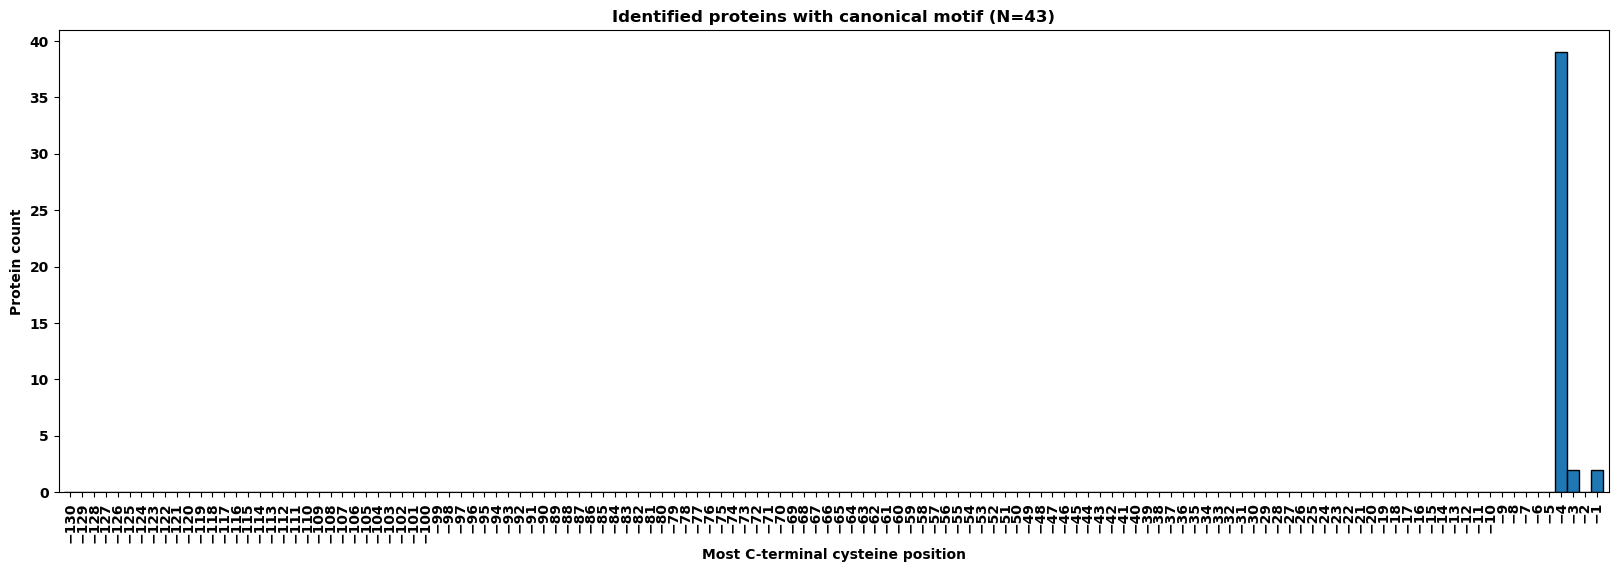

In [24]:
# Histogram of canonical motifs

# position of the first C counting from the end of the sequence backwards
# for the bar plots only
pos = fasta_canon['Cpos']

# Filter data within the range from -100 to -1
filtered_data = [x for x in pos if -130 <= x <= -1]

# Specify the desired bin edges
bin_edges = list(range(-130, 1))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('Most C-terminal cysteine position')
plt.ylabel('Protein count')
plt.title(f'Identified proteins with canonical motif (N={len(pos)})')

# Customize x-axis ticks and labels
plt.xticks(range(-130, 0), rotation=90)

# Set x-axis limits to match the data range
plt.xlim(-131, -0)

# Show the plot
plt.show()

In [25]:
# update fasta
# remove all protein sequence forms
fasta = fasta.loc[~fasta['ID'].isin(fasta_canon['ID'])]

# re-add only the needed isoforms with canonical motif
fasta = pd.concat([fasta, fasta_canon], ignore_index=True).reset_index(drop=True)

## Other motifs

In [26]:
# Continue with proteins that have no canonical motif in any sequence isoform
print('Found proteins with other motif:', len(fasta_iso['ID'].unique()), 'proteins,', len(fasta_iso), 'sequences')

Found proteins with other motif: 6 proteins, 8 sequences


In [27]:
print('Before removing doubles: ', len(fasta_iso))

Before removing doubles:  8


In [28]:
# proteins that have the same ID, pep, Ccount and Cpos are regarded as double, keep first one
fasta_found_double = fasta_iso[fasta_iso.duplicated(subset=['ID', 'Ccount', 'Cpos'])]

# -> remove them from fasta_found_iso
# the first occurence is kept, the df contains only the doubles
# merge and don't keep dublicates to remove them fro df
fasta_iso = pd.concat([fasta_iso, fasta_found_double], ignore_index=True).drop_duplicates(keep=False).reset_index(drop=True)

In [29]:
print('After removing doubles: ', len(fasta_iso))

After removing doubles:  7


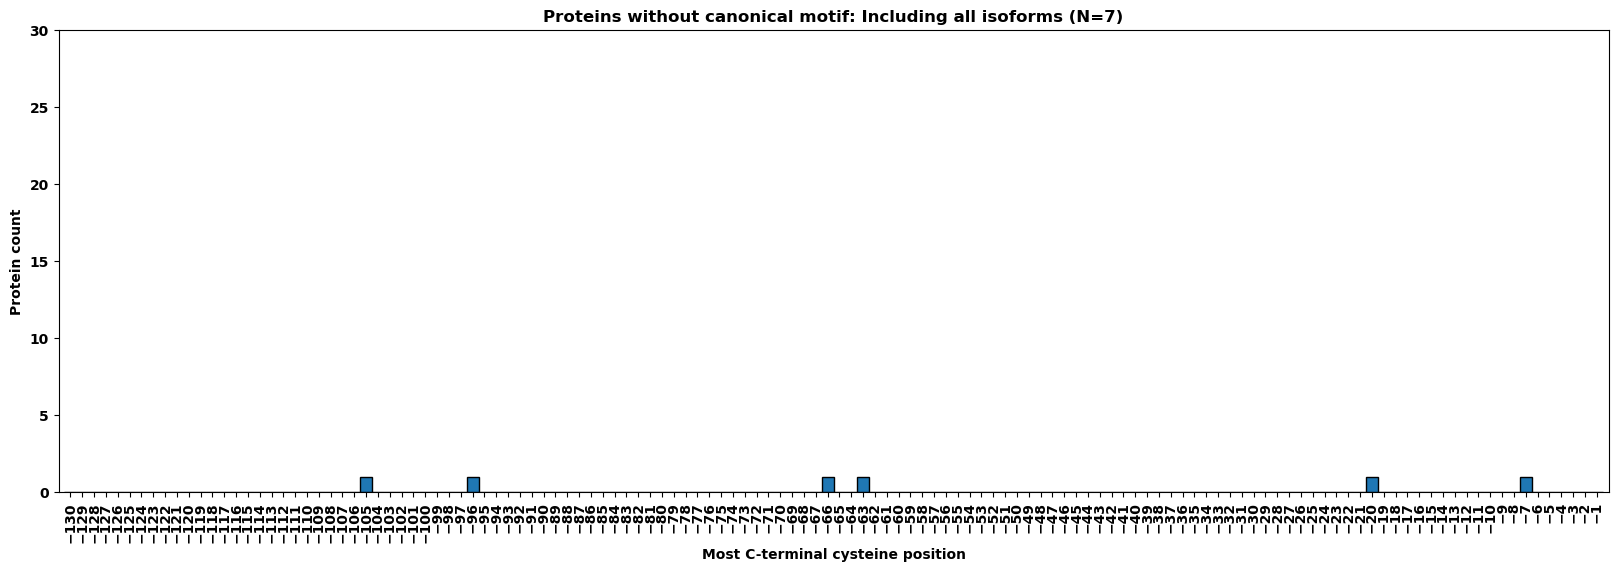

In [30]:
# Histogram of most C-terminal cysteine positions, including all isoforms

# Cpos is the most C-terminal cysteine
pos = fasta_iso['Cpos'].tolist()

# Filter data within the range from -100 to -1
filtered_data = [x for x in pos if -130 <= x <= -1]

# Specify the desired bin edges
bin_edges = list(range(-130, 1))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('Most C-terminal cysteine position')
plt.ylabel('Protein count')
plt.title(f'Proteins without canonical motif: Including all isoforms (N={len(pos)})')

# Customize x-axis ticks and labels
plt.xticks(range(-130, 0), rotation=90)

# Set x-axis limits to match the data range
plt.xlim(-131, -0)
plt.ylim(0, 30)

# Show the plot
plt.show()

In [31]:
# occurences of sequences per protein ID
v = fasta_iso.ID.value_counts()

# proteins that don't have an isoform sequence alternative
fasta_found_no_alternative = fasta_iso[~fasta_iso.ID.isin(v.index[v.gt(1)])].reset_index(drop=True)
print('Found proteins no canonical motif, no alternative isoforms:', len(fasta_found_no_alternative))

# proteins with more than one isoforms alternatives
fasta_found_iso = fasta_iso[fasta_iso.ID.isin(v.index[v.gt(1)])].reset_index(drop=True)
print('Found proteins no canonical motif, multiple alternative isoforms:', len(fasta_found_iso['ID'].unique()), 'proteins,', len(fasta_found_iso), 'possible sequences')

Found proteins no canonical motif, no alternative isoforms: 5
Found proteins no canonical motif, multiple alternative isoforms: 1 proteins, 2 possible sequences


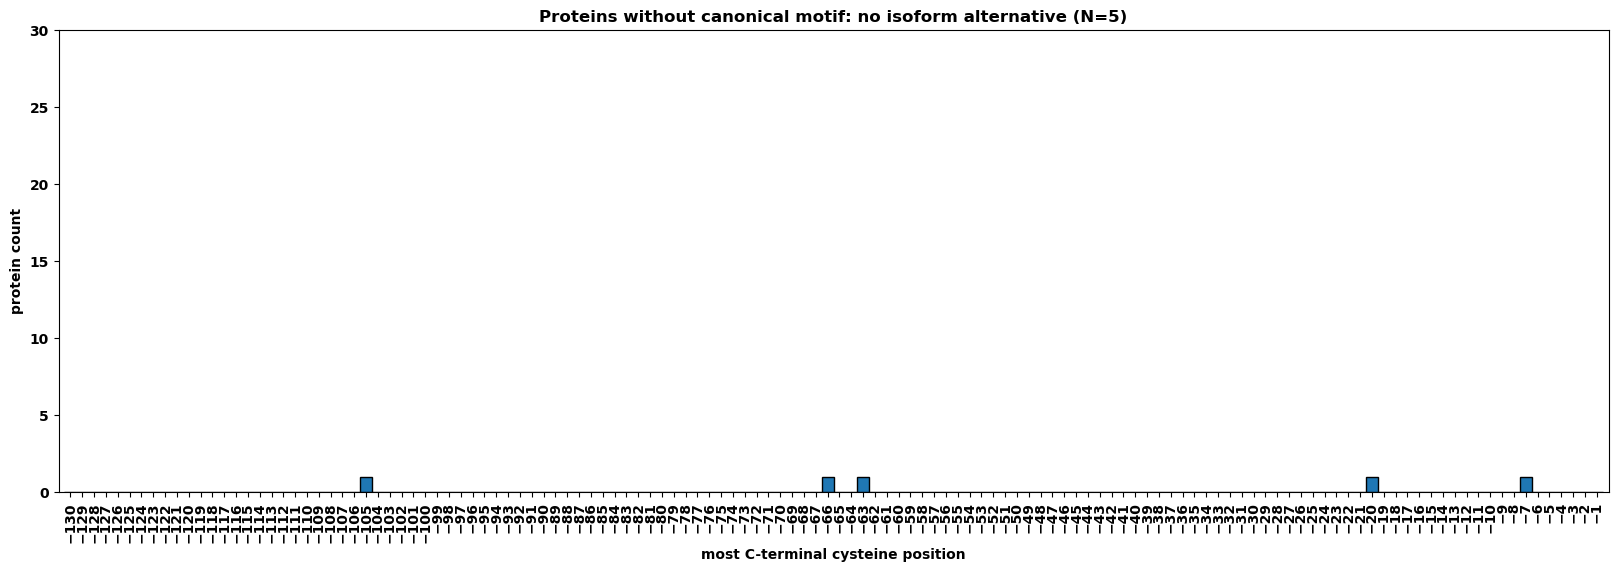

In [32]:
# Histogram of one most C-terminal cysteine position per protein, no alternative, no doubles

# Cpos is the most C-terminal cysteine
pos = fasta_found_no_alternative['Cpos'].tolist()

# Filter data within the range from -30 to -1
filtered_data = [x for x in pos if -130 <= x <= -1]

# Specify the desired bin edges
bin_edges = list(range(-130, 1))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('most C-terminal cysteine position')
plt.ylabel('protein count')
plt.title(f'Proteins without canonical motif: no isoform alternative (N={len(pos)})')

# Set custom x-tick values and labels
plt.xticks(range(-130, 0))
plt.xticks(rotation=90)

# Set x-axis limits to match the data range
plt.xlim(-131, -0)
plt.ylim(0, 30)

plt.show()

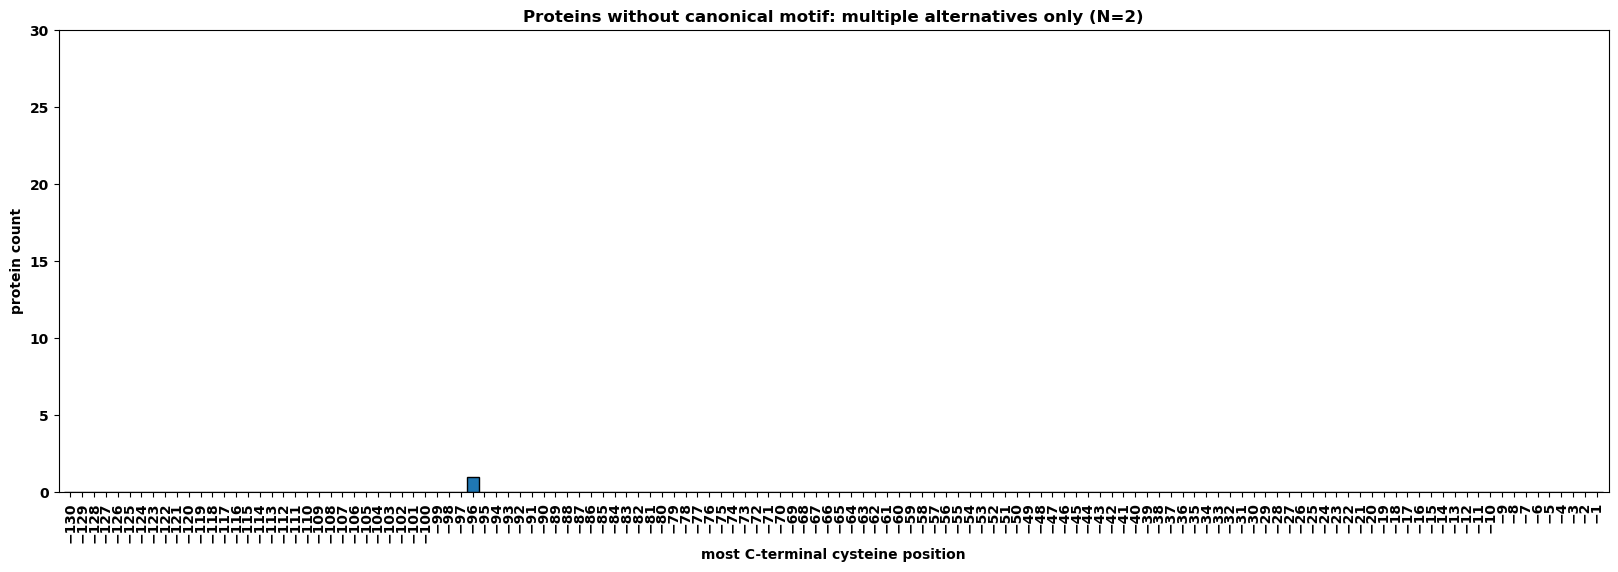

In [33]:
# Histogram of one most C-terminal cysteine position per protein, multiple alternatives only

# Cpos is the most C-terminal cysteine
pos = fasta_found_iso['Cpos'].tolist()

# Filter data within the range from -30 to -1
filtered_data = [x for x in pos if -130 <= x <= -1]

# Specify the desired bin edges
bin_edges = list(range(-130, 1))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('most C-terminal cysteine position')
plt.ylabel('protein count')
plt.title(f'Proteins without canonical motif: multiple alternatives only (N={len(pos)})')

# Set custom x-tick values and labels
plt.xticks(range(-130, 0))
plt.xticks(rotation=90)

# Set x-axis limits to match the data range
plt.xlim(-131, 0)
plt.ylim(0, 30)

plt.show()

## New C-term motifs

In [34]:
# Out of all sequence forms choose those with new C-term
found_newCterm = fasta_iso[fasta_iso['Cpos'].isin([-5, -3, -2])].reset_index(drop=True)

In [35]:
print('New C-term motif:', len(found_newCterm), 'isoforms,',  len(found_newCterm['ID'].unique()), 'proteins')

New C-term motif: 0 isoforms, 0 proteins


## Internal motifs

In [36]:
# Proteins with no canonical motif (found_canon) or new C-term motif (found_newCterm) in canonical sequence or isoform
fasta_internal = fasta[~fasta['ID'].isin(fasta_canon['ID'])]
fasta_internal = fasta_internal[~fasta_internal['ID'].isin(found_newCterm['ID'])]

In [37]:
# reminder, false positive identified proteins with cysteine in isoform sequence
fasta_internal[fasta_internal['seqID'].str.contains('-')].reset_index(drop=True)

,ID,seqID,seq,len,Ccount,Cpos,motif


## Save fasta file with correct actualized isoforms and motif information

In [38]:
# Recap
print('Canonical motif:', len(fasta_canon), ', New-C-terminal motif:', len(found_newCterm), ', Internal cysteines:', len(fasta_internal))
print('Total:', len(fasta_canon)+ len(found_newCterm)+ len(fasta_internal))

# 4 proteins with cysteines only in isoforms (see Notebook 2.1) will be excluded from fasta_internal in structure analysis
# because AlphaFold doesn't contain 3D structures of isoforms

Canonical motif: 43 , New-C-terminal motif: 0 , Internal cysteines: 6
Total: 49


In [39]:
# add pep column for C-terminal peptides
pep_Cterm(fasta_canon)
fasta_internal['pep'] = np.nan

In [40]:
# add name column from Uniprot info
fasta_canon = fasta_canon.merge(all_found[['ID', 'name']], on='ID', how='left')
fasta_internal = fasta_internal.merge(all_found[['ID', 'name']], on='ID', how='left')

In [41]:
# Reorder the columns to place 'name' as the second column
columns_order = ['ID', 'name'] + [col for col in fasta_canon.columns if col not in ['ID', 'name']]

fasta_canon = fasta_canon[columns_order]
fasta_internal = fasta_internal[columns_order]

In [42]:
# merge all three gourps to one df
fasta = pd.concat([fasta_canon, fasta_internal], ignore_index=True)

In [43]:
# Update cysteine position to match motif
fasta['Cpos'] = None

for i, motif in enumerate(fasta['motif']):
    
    if motif == 'CAAX' or motif == 'CXXX':
        fasta.at[i, 'Cpos'] = -4
        
    elif motif == 'CXC':
        fasta.at[i, 'Cpos'] = [-3, -1]
        
    elif motif == 'CCX':
        fasta.at[i, 'Cpos'] = [-3, -2]
        
    elif motif == 'CC':
        fasta.at[i, 'Cpos'] = [-2, -1]
        
    elif motif == 'C':
        fasta.at[i, 'Cpos'] = -1
        
    elif motif == 'CX':
        fasta.at[i, 'Cpos'] = -2

    elif motif == 'CXX':
        fasta.at[i, 'Cpos'] = -3
        
    elif motif == 'CXXXX':
        fasta.at[i, 'Cpos'] = -5

    elif motif == 'CCC':
        fasta.at[i, 'Cpos'] = [-3, -2, -1]

In [44]:
fasta['motif'] = fasta['motif'].fillna('internal')

In [45]:
# save
fasta.to_csv(os.path.join(datafolder, 'identified_proteins', 'final_fasta_seqs_identified_prots.csv'), sep=',', index=False)

## Add new motif information to dfs of identified proteins

In [46]:
# Replace 'motif' values in 'all_found' with values from 'fasta' based on matching 'ID'
all_found['motif'] = all_found['ID'].map(fasta.set_index('ID')['motif'])
novel_found['motif'] = novel_found['ID'].map(fasta.set_index('ID')['motif'])

# Replace 'pep' values in 'all_found' with values from 'fasta' based on matching 'ID'
all_found['pep'] = all_found['ID'].map(fasta.set_index('ID')['pep'])
novel_found['pep'] = novel_found['ID'].map(fasta.set_index('ID')['pep'])

# save
all_found.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_all_motif.csv'), sep=',', index=False)
novel_found.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_novel_motif.csv'), sep=',', index=False)